In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

path = r'C:\Users\santi\Universidad de Antioquia\VALERIA CADAVID CASTRO - Resultados_Armonizacion_BD'

In [2]:
data_roi=pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_roi.feather'.format(path=path))
data_com=pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_ic.feather'.format(path=path))

In [3]:
data_roi

,index,participant_id,group,visit,condition,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,...,crossfreq_PO_Mbeta3_Gamma,crossfreq_PO_Mgamma_Gamma,crossfreq_T_Mdelta_Gamma,crossfreq_T_Mtheta_Gamma,crossfreq_T_Malpha-1_Gamma,crossfreq_T_Malpha-2_Gamma,crossfreq_T_Mbeta1_Gamma,crossfreq_T_Mbeta2_Gamma,crossfreq_T_Mbeta3_Gamma,crossfreq_T_Mgamma_Gamma
0,0,sub-CTR001,Control,V0,CE,0.136705,0.065395,0.090212,0.018397,0.080754,...,0.192331,0.249518,53.574044,2.639621,0.400858,0.258356,0.991277,0.262716,1.253094,2.950797
1,1,sub-CTR017,Control,V0,CE,0.176222,0.153429,0.106082,0.132658,0.121762,...,0.171657,0.113062,84.452758,3.865858,0.483998,0.266418,0.486652,0.126108,0.171185,0.113707
2,2,sub-CTR017,Control,V2,CE,0.124938,0.119499,0.096974,0.062964,0.169828,...,0.148453,0.110206,78.867133,6.418085,0.589287,0.310571,0.401222,0.097573,0.176621,0.182332
3,3,sub-CTR017,Control,V3,CE,0.179052,0.173429,0.165252,0.170741,0.144116,...,0.120135,0.081170,85.239906,3.461182,0.496983,0.243029,0.392802,0.102811,0.183925,0.188289
4,4,sub-CTR018,Control,V0,CE,0.348817,0.289987,0.223899,0.269197,0.134172,...,0.077726,0.054412,89.957543,2.757264,0.392008,0.182494,0.233311,0.061037,0.083231,0.063317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,63,sub-ALZS044,Control,V0,resting,0.075185,0.045617,0.039241,0.045894,0.054866,...,0.302825,0.151876,79.818379,4.649865,0.541271,0.328923,0.725827,0.184976,0.274402,0.160323
418,64,sub-ALZS043,Control,V0,resting,0.322396,0.311239,0.273467,0.302613,0.285133,...,0.050641,0.038684,88.417979,3.861673,0.433306,0.174094,0.165432,0.044590,0.058787,0.044522
419,65,sub-ALZS042,Control,V0,resting,0.167935,0.124089,0.089169,0.126626,0.083505,...,0.182488,0.127067,86.629729,3.428582,0.449989,0.260269,0.399480,0.088598,0.122216,0.092195
420,66,sub-ALZS027,Control,V0,resting,0.077410,0.056573,0.056716,0.066608,0.409986,...,0.165742,0.121729,82.285755,4.544186,0.773272,0.384618,0.400078,0.113423,0.153854,0.126210


In [4]:
data_com

,index,participant_id,visit,group,condition,database,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,...,crossfreq_C25_Mbeta3_Beta3,crossfreq_C25_Mgamma_Beta3,crossfreq_C25_Mdelta_Gamma,crossfreq_C25_Mtheta_Gamma,crossfreq_C25_Malpha-1_Gamma,crossfreq_C25_Malpha-2_Gamma,crossfreq_C25_Mbeta1_Gamma,crossfreq_C25_Mbeta2_Gamma,crossfreq_C25_Mbeta3_Gamma,crossfreq_C25_Mgamma_Gamma
0,0,sub-CTR001,V0,Control,CE,BIOMARCADORES,0.051364,0.014170,0.038517,0.036840,...,1.300592,0.0,0.116913,0.029971,0.039297,0.048367,0.083094,0.051188,0.370847,3.045180
1,1,sub-CTR017,V0,Control,CE,BIOMARCADORES,0.123849,0.050573,0.196801,0.137692,...,0.243164,0.0,0.107787,0.045042,0.137851,0.127262,0.088898,0.018225,0.064138,0.174409
2,2,sub-CTR017,V2,Control,CE,BIOMARCADORES,0.086113,0.061844,0.174856,0.116405,...,0.266253,0.0,0.091083,0.075706,0.157515,0.126932,0.099089,0.016633,0.072096,0.290145
3,3,sub-CTR017,V3,Control,CE,BIOMARCADORES,0.122635,0.093048,0.136205,0.109801,...,0.104677,0.0,0.151129,0.020879,0.034818,0.037962,0.032161,0.008086,0.033236,0.084266
4,4,sub-CTR018,V0,Control,CE,BIOMARCADORES,0.258650,0.084168,0.082835,0.122452,...,0.156805,0.0,0.104938,0.029410,0.058646,0.046118,0.028193,0.009653,0.045986,0.181613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,61,sub-ALZS046,V0,Control,resting,DUQUE,0.161812,0.058283,0.206229,0.156271,...,0.240826,0.0,0.150357,0.032605,0.108918,0.120802,0.075673,0.012422,0.073477,0.289773
414,62,sub-ALZS043,V0,Control,resting,DUQUE,0.260105,0.213918,0.136365,0.085489,...,0.116878,0.0,0.066015,0.063952,0.044561,0.018568,0.027958,0.009271,0.034691,0.149969
415,63,sub-ALZS042,V0,Control,resting,DUQUE,0.042663,0.028603,0.056898,0.167310,...,0.326382,0.0,0.097899,0.048817,0.130764,0.338500,0.345795,0.032506,0.103153,0.273297
416,64,sub-ALZS027,V0,Control,resting,DUQUE,0.040451,0.134720,0.500172,0.194519,...,0.180991,0.0,0.138410,0.268841,0.284408,0.101449,0.105734,0.021041,0.062417,0.195072


In [5]:
# Se quitan los grupos que no van en el clafisicador

data_roi.drop(data_roi[data_roi.group == 'DCL'].index, inplace=True)
data_com.drop(data_com[data_com.group == 'DCL'].index, inplace=True)

In [6]:
# Para ver diagramas de dispersión

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_roi_scatter = data_roi.select_dtypes(include=numerics)

data_com_scatter = data_com.select_dtypes(include=numerics)

<AxesSubplot:xlabel='index', ylabel='power_C14_Delta'>

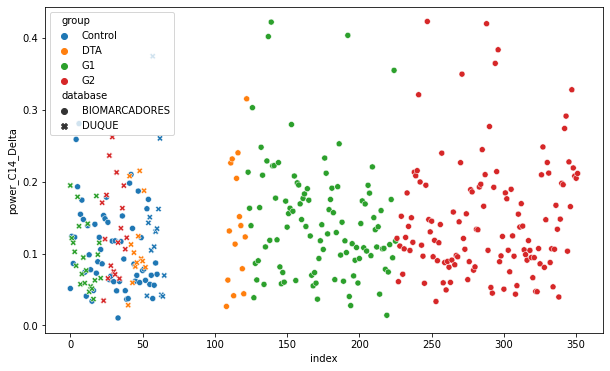

In [10]:
fig = plt.gcf()

fig.set_size_inches(10, 6)
sns.scatterplot(data=data_com,
            y='power_C14_Delta',
            x='index',
            hue='group',
            style='database',
            )


In [ ]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las ROI'S

""" for i in data_roi_scatter.columns.values[1:]:
    
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_roi,
                y=i,
                x='index',
                hue='group',
                style='database',
                 )

    plt.show()
 """

In [ ]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las Componentes

""" for i in data_com_scatter.columns.values[1:]:

    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_com,
                y=i,
                x='index',
                hue='group',
                style='database',
                )

    plt.show() """

In [15]:
# Se extraen las potencias para realizar una prueba con máquinas de soporte vectorial
# revisar posibles pipelines con preprocesamiento (estandarización, normalización)

power_data_roi = data_roi.filter(regex='power')
power_data_roi['group'] = data_roi['group']
power_data_roi

C:\Users\santi\AppData\Local\Temp\ipykernel_16312\2208338475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi['group'] = data_roi['group']


,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,power_PO_Theta,power_T_Theta,power_F_Alpha-1,power_C_Alpha-1,...,power_T_Beta2,power_F_Beta3,power_C_Beta3,power_PO_Beta3,power_T_Beta3,power_F_Gamma,power_C_Gamma,power_PO_Gamma,power_T_Gamma,group
0,0.136705,0.065395,0.090212,0.018397,0.080754,0.097227,0.095204,0.023882,0.233052,0.287558,...,0.051153,0.124246,0.120121,0.108114,0.195861,0.277019,0.256305,0.232313,0.520237,Control
1,0.176222,0.153429,0.106082,0.132658,0.121762,0.105554,0.107344,0.098909,0.288058,0.280397,...,0.070666,0.065000,0.069002,0.053548,0.074630,0.047228,0.046386,0.033830,0.060853,Control
2,0.124938,0.119499,0.096974,0.062964,0.169828,0.135782,0.137697,0.087088,0.305239,0.305564,...,0.046880,0.075563,0.074030,0.056660,0.138452,0.087712,0.072005,0.043845,0.221611,Control
3,0.179052,0.173429,0.165252,0.170741,0.144116,0.151574,0.141099,0.124178,0.211774,0.235246,...,0.051142,0.100633,0.080408,0.065316,0.092851,0.086545,0.051721,0.034872,0.105675,Control
4,0.348817,0.289987,0.223899,0.269197,0.134172,0.128697,0.147685,0.113679,0.199860,0.200571,...,0.040523,0.062868,0.073996,0.052040,0.081009,0.052924,0.052890,0.031353,0.101016,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.075185,0.045617,0.039241,0.045894,0.054866,0.062867,0.052454,0.068563,0.105272,0.105598,...,0.075493,0.049596,0.069093,0.045413,0.070231,0.027220,0.027400,0.020201,0.028527,Control
418,0.322396,0.311239,0.273467,0.302613,0.285133,0.269438,0.294610,0.254263,0.134068,0.150011,...,0.021630,0.057459,0.059941,0.044801,0.055540,0.052437,0.036638,0.037637,0.044468,Control
419,0.167935,0.124089,0.089169,0.126626,0.083505,0.064236,0.057841,0.060033,0.105909,0.103210,...,0.056599,0.115846,0.130557,0.066916,0.087439,0.072441,0.028796,0.024397,0.045092,Control
420,0.077410,0.056573,0.056716,0.066608,0.409986,0.276162,0.373366,0.301436,0.329283,0.457817,...,0.024865,0.025029,0.023913,0.014536,0.031597,0.017578,0.007273,0.008972,0.034613,Control


In [16]:
power_data_com = data_com.filter(regex='power')
power_data_com['group'] = data_com['group']
power_data_com

C:\Users\santi\AppData\Local\Temp\ipykernel_16312\4184847902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com['group'] = data_com['group']


,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,power_C24_Gamma,power_C25_Delta,power_C25_Theta,power_C25_Alpha-1,power_C25_Alpha-2,power_C25_Beta1,power_C25_Beta2,power_C25_Beta3,power_C25_Gamma,group
0,0.051364,0.014170,0.038517,0.036840,0.128756,0.062628,0.208624,0.459102,0.130821,0.027658,...,0.418538,0.126040,0.021880,0.118854,0.083719,0.098417,0.051798,0.148252,0.351040,Control
1,0.123849,0.050573,0.196801,0.137692,0.190550,0.138484,0.103443,0.058608,0.235891,0.112302,...,0.071550,0.110734,0.067652,0.390049,0.172874,0.137910,0.047295,0.047224,0.026262,Control
2,0.086113,0.061844,0.174856,0.116405,0.174375,0.089877,0.131659,0.164872,0.147927,0.217919,...,0.080303,0.105602,0.082669,0.398443,0.176257,0.112945,0.035869,0.047931,0.040284,Control
3,0.122635,0.093048,0.136205,0.109801,0.248049,0.090080,0.111673,0.088508,0.183832,0.144753,...,0.039477,0.249400,0.120137,0.282350,0.124876,0.107510,0.036775,0.048835,0.030118,Control
4,0.258650,0.084168,0.082835,0.122452,0.170350,0.046309,0.122022,0.113214,0.423568,0.126828,...,0.058886,0.224661,0.109231,0.323537,0.109326,0.092462,0.032679,0.060702,0.047402,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.161812,0.058283,0.206229,0.156271,0.155841,0.064073,0.104432,0.093060,0.369678,0.086467,...,0.056912,0.098426,0.057216,0.413332,0.250311,0.086018,0.021089,0.035282,0.038326,Control
414,0.260105,0.213918,0.136365,0.085489,0.121338,0.033049,0.087660,0.062075,0.312101,0.291520,...,0.045383,0.261595,0.243108,0.192356,0.087458,0.090081,0.022557,0.055112,0.047733,Control
415,0.042663,0.028603,0.056898,0.167310,0.360637,0.121566,0.182497,0.039824,0.103224,0.076324,...,0.022339,0.045884,0.029652,0.083854,0.423660,0.318126,0.032106,0.052135,0.014584,Control
416,0.040451,0.134720,0.500172,0.194519,0.066996,0.025922,0.028799,0.008421,0.068044,0.210064,...,0.022126,0.050768,0.358984,0.431792,0.061551,0.058956,0.011950,0.014391,0.011608,Control
